# Case iFood  - EDA

This code is part of iFood Brain case solution

Here, you'll find an initial exploraiton and data preparation for the further Segmentaiton & Model building.

#### Workbook Structure:

<ul>
<li>Dataset Summary;</li>
<li>Missing Value and Outliers Analysis;</li>
<li>Feature Manipulation; </li>
<li>Distributions & Correlation Analisys;</li> 
<li>Distributions & Correlation Analisys;</li> 
</ul>

#### Hypothesis

<ol>
<li>Active and expensive buyers have a higher conversion rate;</li>
<li>The share of products/spend correlate to the conversion rate; </li>
<li>People who buy more through Store channel are less prone to accept the campaing;</li>
<li>The higher the percent of deal purchases and/or gold products bought, the higher the conversion rate ;</li>    
<li>The conversion rate of previous campaings may indicate the probability of acceptance of current campaing;</li>    
</ol>

Augusto Otto Molke - augusto.molke@ifood.com.br

# Dataset Summary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline



def normalize_zscore(column):
    avg = column.mean()
    std = column.std()
    y = (column - avg)/(std)
    return y

def normalize_minmax(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y




In [2]:
df = pd.read_csv('ml_project1_data.csv')

#### The dataset has 2240 rows and 29 columns

In [3]:
df.shape

(2240, 29)

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Identifing Outliers
A quick way of identifying outliers is using boxplot. This approach is simple and effective but neet to be used with caution since it can chop off a important part of your data.
Lets take a look in how much outliers this approach would' identify for each column:

#### Lets drop outliers of Income and Year_Birth

Since we have a lots of data that was identified as outlier in columns of [0,1], those are not actually outliers.


# Features Manipulation


<ul>
<li>Processing date values (calcularing years of age and years as a customer); </li>
<li>Dropping unnecessary data;</li>    
<li>Calculating new features to suport our hypothesis;</li>    
</ul>

#### Processing dates

In [6]:
df["Age"] = datetime.now().year-df["Year_Birth"]
df["Years_as_Customer"]=datetime.now().year-pd.DatetimeIndex(df['Dt_Customer']).year

#### Dropping Unecessary Data

In [7]:
df  = df.drop(['Year_Birth','Dt_Customer','ID'],axis=1)

#### Nulls and Dulicated data

In [8]:

print(f"Amount of nulls in each feature: \n{df.isnull().sum()}")

Amount of nulls in each feature: 
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Years_as_Customer       0
dtype: int64


In [9]:
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 182


We'll replace the missing Income information with the median and drop the duplicated since they are not useful for our model.

In [10]:
df =df.fillna(df.median())
df.drop_duplicates(inplace=True)

In [11]:
pd.set_option('max_columns', None)
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_as_Customer
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000,2058.000000,2058.000000
mean,52346.406220,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,3.0,11.0,0.152089,51.212828,6.968416
std,25377.819022,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195,11.973898,0.685621
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,24.000000,6.000000
25%,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000,6.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,50.000000,7.000000
75%,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,7.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,127.000000,8.000000




The date seems to be really skewd, mostly for amount spent per product category and income (the difference between max and pct 75% is too high)


#### Feature calculation for Hypothesis testing


In order to support our hyphotesis, we'll calculate some new features as below:

In [12]:

#General calculation
df["Family_Size"]=df["Teenhome"]+df["Kidhome"]+1
df['Total_income_familymember']=df['Income']/(df["Family_Size"])

# Hypothesis 5:
#Total Conversion from previous campaing and what was the most recent one
df['Total_Conv']=(df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'])
df['RecentCmp']=(df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mul([1,2,3,4,5])).max(axis=1)



#Hypothesis 1:
#Average order Value, Total spent ( and percent of income), 
#Total amount of purchases (and total per year as customer)
df['Total_spent']=(df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts'])
df['Total_spent_percent_income']=(df['Total_spent']/2)/(df['Income']+1)
df['Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['AOV']=df['Total_spent']/(df['Total_Purchases']+1)
df['Total_Purchases_year']=df['Total_Purchases']/df["Years_as_Customer"]


#Hypothesis 2:
df['%Wine']=(df['MntWines']/2)/df['Total_income_familymember']
df['%Fruit']=(df['MntFruits']/2)/df['Total_income_familymember']
df['%Meat']=(df['MntMeatProducts']/2)/df['Total_income_familymember']
df['%Fish']=(df['MntFishProducts']/2)/df['Total_income_familymember']
df['%Sweet']=(df['MntSweetProducts']/2)/df['Total_income_familymember']
df['%Gold']=(df['MntGoldProds']/2)/df['Total_income_familymember']


#Hypothesis 3:

df['%WebPurchases']=df['NumWebPurchases']/(df['Total_Purchases']+1)
df['%CatalogPurchases']=df['NumCatalogPurchases']/(df['Total_Purchases']+1)
df['%StorePurchases']=(df['NumStorePurchases'])/(df['Total_Purchases']+1)

#Hypothesis 4:
df['%DealPurchases']=df['NumDealsPurchases']/(df['Total_Purchases']+1)



#### Now lets take a look in our data:

In [13]:
pd.set_option('max_columns', None)
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_as_Customer,Family_Size,Total_income_familymember,Total_Conv,RecentCmp,Total_spent,Total_spent_percent_income,Total_Purchases,AOV,Total_Purchases_year,%Wine,%Fruit,%Meat,%Fish,%Sweet,%Gold,%WebPurchases,%CatalogPurchases,%StorePurchases,%DealPurchases
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,52346.406220,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,3.0,11.0,0.152089,51.212828,6.968416,1.954810,33769.270469,0.300292,0.775996,562.367347,0.004537,12.530126,32.219625,1.800323,0.004104,0.000340,0.002253,0.000477,0.000352,0.000802,0.296390,0.152402,0.444140,0.229281
std,25377.819022,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195,11.973898,0.685621,0.748616,25935.789283,0.678305,1.613286,577.335025,0.008534,7.188098,32.752779,1.032961,0.004333,0.000458,0.015600,0.000610,0.000491,0.002269,0.113328,0.131758,0.115672,0.510141
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,24.000000,6.000000,1.000000,1223.500000,0.000000,0.000000,4.000000,0.000016,0.000000,1.461538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000,6.000000,1.000000,15448.375000,0.000000,0.000000,55.000000,0.000940,6.000000,8.400000,0.857143,0.000783,0.000045,0.000518,0.000079,0.000042,0.000188,0.214286,0.000000,0.375000,0.076923
50%,51381.500000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,50.000000,7.000000,2.000000,24826.750000,0.000000,0.000000,341.500000,0.003468,12.000000,24.392857,1.714286,0.002684,0.000166,0.001380,0.000251,0.000174,0.000435,0.285714,0.142857,0.444444,0.187500
75%,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,7.000000,2.000000,38976.625000,0.000000,0.000000,963.500000,0.007189,18.000000,43.677083,2.625000,0.006039,0.000452,0.002880,0.000642,0.000459,0.000952,0.375000,0.230769,0.500000,0.314967
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,127.000000,8.000000,4.000000,333333.000000,4.000000,5.000000,2491.000000,0.353145,32.000000,828.500000,5.166667,0.034121,0.005034,0.704945,0.005498,0.0

Seems like we have some weird data here.

<ul>
<li>There are some rows with 0 total purchases;</li>
<li>We have customers who made 15x more deal purchases than actuall total purchases (which I'm assuming doesn't make sense); </li>
<li>Someone is 127 years old;</li>
</ul>

Lets check outliers:

In [14]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = 1.5*(Q3 - Q1)

# Iterate over the sequence of column names
for column in df:
    if df[column].dtype!='object':
        print(column,":", df[((df[column] < (Q1[column]-1.5 * IQR[column])) |(df[column] > (Q3[column] + 1.5 * IQR[column])))].shape[0])
        #print(column,":", df[((df[column] < (Q1[column]-1.5 * IQR[column])) |(df[column] > (Q3[column] + 1.5 * IQR[column])))].shape[0])

Income : 8
Kidhome : 0
Teenhome : 0
Recency : 0
MntWines : 0
MntFruits : 142
MntMeatProducts : 92
MntFishProducts : 128
MntSweetProducts : 145
MntGoldProds : 108
NumDealsPurchases : 44
NumWebPurchases : 4
NumCatalogPurchases : 4
NumStorePurchases : 0
NumWebVisitsMonth : 6
AcceptedCmp3 : 151
AcceptedCmp4 : 158
AcceptedCmp5 : 148
AcceptedCmp1 : 135
AcceptedCmp2 : 26
Complain : 20
Z_CostContact : 0
Z_Revenue : 0
Response : 313
Age : 3
Years_as_Customer : 0
Family_Size : 0
Total_income_familymember : 28
Total_Conv : 431
RecentCmp : 431
Total_spent : 0
Total_spent_percent_income : 1
Total_Purchases : 0
AOV : 9
Total_Purchases_year : 0
%Wine : 23
%Fruit : 79
%Meat : 10
%Fish : 73
%Sweet : 87
%Gold : 85
%WebPurchases : 4
%CatalogPurchases : 4
%StorePurchases : 17
%DealPurchases : 3


Yes, we have some outliers, but also:


<ul>
<li>The amount spent per category items seems to be really skewd, its dangerous to remore outliers and loose too much information. We'll check theirs distribution later on;</li>
<li>Binary data do not have outliers. Boxplot method do not work with this kind of data</li>
<li>Age, %DealPurchases,Income, AOV </li>
</ul>



In [15]:
colunas_out=['%Gold','Age','%DealPurchases','Income','AOV','%Meat']#,'%Fruit','%Wine','%Sweet','%Fish','%CatalogPurchases','%WebPurchases']
df = df[~((df[colunas_out] < (Q1[colunas_out]-1.5 * IQR[colunas_out])) |(df[colunas_out] > (Q3[colunas_out] + 1.5 * IQR[colunas_out]))).any(axis=1)]
df.shape

(1942, 47)

We still need to check if there is something wrong with people who didn't make any purchase:

In [16]:
df[df['Total_Purchases']==0]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_as_Customer,Family_Size,Total_income_familymember,Total_Conv,RecentCmp,Total_spent,Total_spent_percent_income,Total_Purchases,AOV,Total_Purchases_year,%Wine,%Fruit,%Meat,%Fish,%Sweet,%Gold,%WebPurchases,%CatalogPurchases,%StorePurchases,%DealPurchases
981,Graduation,Divorced,4861.0,0,0,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,55,6,1,4861.0,0,0,5,0.000514,0,5.0,0.0,0.000206,0.000103,0.000103,0.000103,0.0,0.000103,0.0,0.0,0.0,0.0
1524,Graduation,Single,3502.0,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,47,7,2,1751.0,0,0,4,0.000571,0,4.0,0.0,0.000571,0.000286,0.000286,0.000000,0.0,0.000286,0.0,0.0,0.0,0.0


Okay, we have two rows whit data that indicated 0 purchases and still a amount of 5 or 4 spent. I'll assume that's wrong data and chop it off.

In [17]:
df.drop(df[df['Total_Purchases']==0].index, inplace=True)

In [18]:
df.groupby('Response').count()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Years_as_Customer,Family_Size,Total_income_familymember,Total_Conv,RecentCmp,Total_spent,Total_spent_percent_income,Total_Purchases,AOV,Total_Purchases_year,%Wine,%Fruit,%Meat,%Fish,%Sweet,%Gold,%WebPurchases,%CatalogPurchases,%StorePurchases,%DealPurchases
Response,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652
1,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288


So now we have 1940 rows left, from which 288  (17,4%) accepted the campaing.

# Distributions

Now lets analyze the data relation with the "Response" column, which is our target.



#### First we'll evaluate some categorigal features:

[Text(0, 0.5, 'Response'), Text(0.5, 0, 'AcceptedCmp5')]

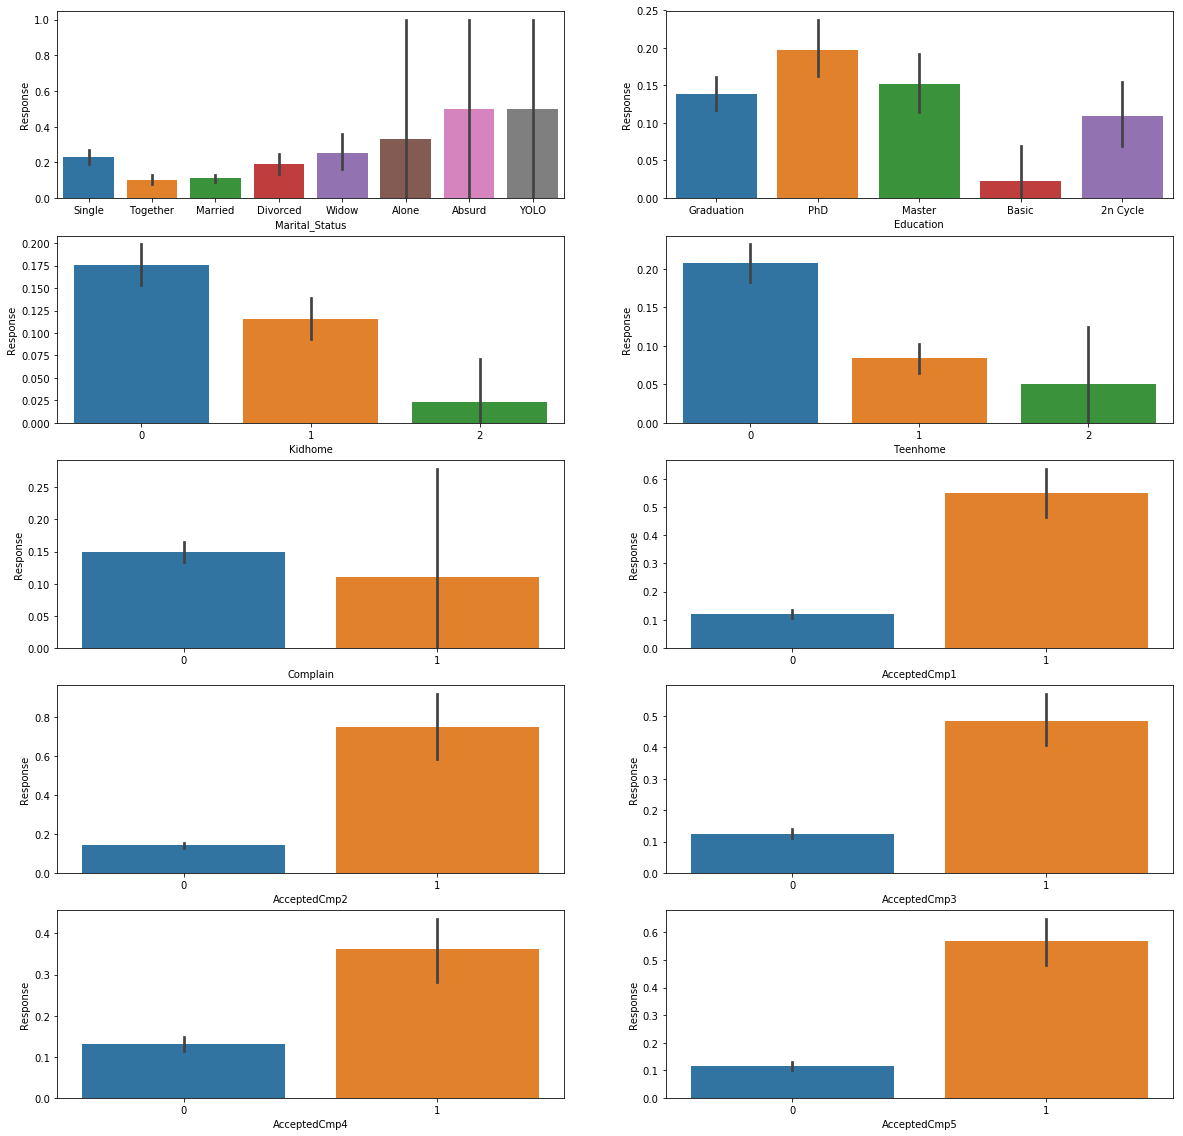

In [19]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 20)
sns.barplot(x='Marital_Status',y='Response',data=df,ax=axes[0][0])
sns.barplot(x='Education',y='Response',data=df,ax=axes[0][1])
sns.barplot(x='Kidhome',y='Response',data=df,ax=axes[1][0])
sns.barplot(x='Teenhome',y='Response',data=df,ax=axes[1][1])
sns.barplot(x='Complain',y='Response',data=df,ax=axes[2][0])
sns.barplot(x='AcceptedCmp1',y='Response',data=df,ax=axes[2][1])
sns.barplot(x='AcceptedCmp2',y='Response',data=df,ax=axes[3][0])
sns.barplot(x='AcceptedCmp3',y='Response',data=df,ax=axes[3][1])
sns.barplot(x='AcceptedCmp4',y='Response',data=df,ax=axes[4][0])
sns.barplot(x='AcceptedCmp5',y='Response',data=df,ax=axes[4][1])

axes[0][0].set(xlabel='Marital_Status', ylabel='Response')
axes[0][1].set(xlabel='Education', ylabel='Response')
axes[1][0].set(xlabel='Kidhome', ylabel='Response')
axes[1][1].set(xlabel='Teenhome', ylabel='Response')
axes[2][0].set(xlabel='Complain', ylabel='Response')
axes[2][1].set(xlabel='AcceptedCmp1', ylabel='Response')
axes[3][0].set(xlabel='AcceptedCmp2', ylabel='Response')
axes[3][1].set(xlabel='AcceptedCmp3', ylabel='Response')
axes[4][0].set(xlabel='AcceptedCmp4', ylabel='Response')
axes[4][1].set(xlabel='AcceptedCmp5', ylabel='Response')




<ul>
<li>The 'Marital_status' field has some weird values (YOLO, Alone, Absurd). We'll consider these status as 'Single';</li>
<li>The 'Education' column shows that customers with PhD has a higher conversion rate, but thats probably because this is highly correlated to 'Income'. Customers with 'Basic' education seems to have lower conversion rate but the variance is too high; </li>
<li>Seems like the number of Kids and Teens have the same effect in our target: the less offspring, the higher the conversion. Besides thats, seems like customer with no children/teens has a significant higher Conversion Rate;</li>  
<li>Also, seems like people who accepted previous campaings have a higher conversion rate. We'll check the relation with 'Total_Conv' which is basicaly the total amount of campaings accepted.;</li> 
</ul>



In [20]:
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['YOLO','Absurd','Alone']), 'Single', df['Marital_Status'])
#df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Married','Together']), 0, 1)
#df['Education'] = np.where(df['Education'].isin(['PhD','Graduation']), 1, 0)


#### Now lets see how our new features relate to 'Response'

[Text(0, 0.5, 'Response'), Text(0.5, 0, 'Family_Size')]

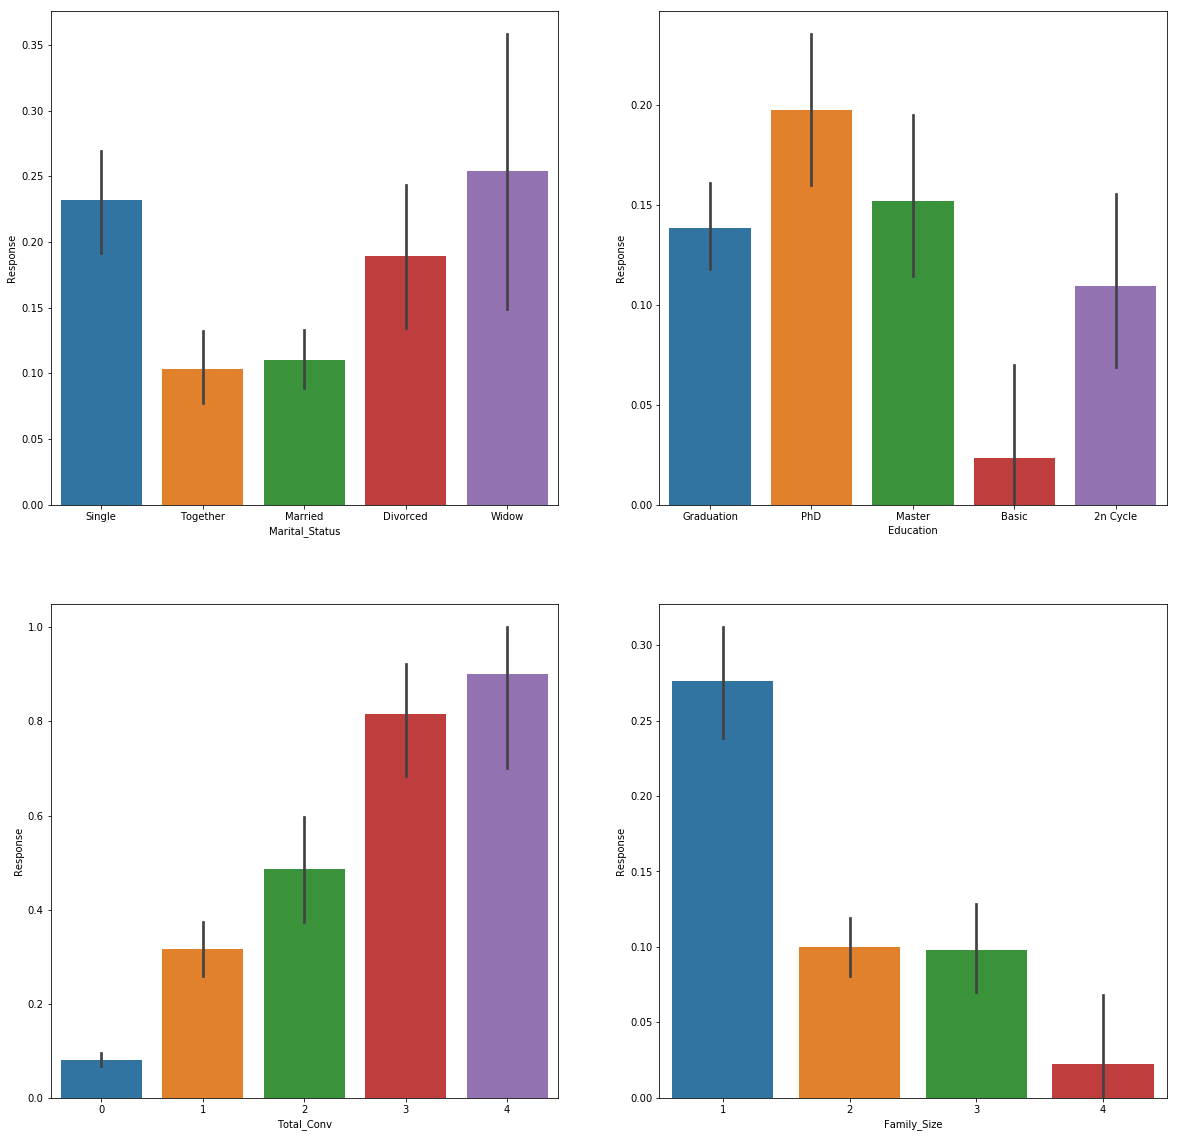

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 20)
sns.barplot(x='Marital_Status',y='Response',data=df,ax=axes[0][0])
sns.barplot(x='Education',y='Response',data=df,ax=axes[0][1])
sns.barplot(x='Total_Conv',y='Response',data=df,ax=axes[1][0])
sns.barplot(x='Family_Size',y='Response',data=df,ax=axes[1][1])

axes[0][0].set(xlabel='Marital_Status', ylabel='Response')
axes[0][1].set(xlabel='Education', ylabel='Response')
axes[1][0].set(xlabel='Total_Conv', ylabel='Response')
axes[1][1].set(xlabel='Family_Size', ylabel='Response')

Seems like we have now 3 new features that have a significant difference in conversion rate based on their values!

Our ML model will probably have some patterns to learn about our dataset using those features.

### Now lets see how the differents buyer profiles relate to the target

To better understand the buyer profile, we created some new features:

<ul>
<li>Total_income_familymember: total Income per family member ;</li>
<li>Total_spent: sum of total spend in the different categories of products; </li>
<li>Total_spent_percent_income: total spent as a percent of total income;</li> 
<li>Total_Purchases: sum of number of purchases through the different channels;</li> 
<li>AOV: average order value;</li> 
</ul>


[Text(0, 0.5, 'Response'), Text(0.5, 0, 'MntFruits')]

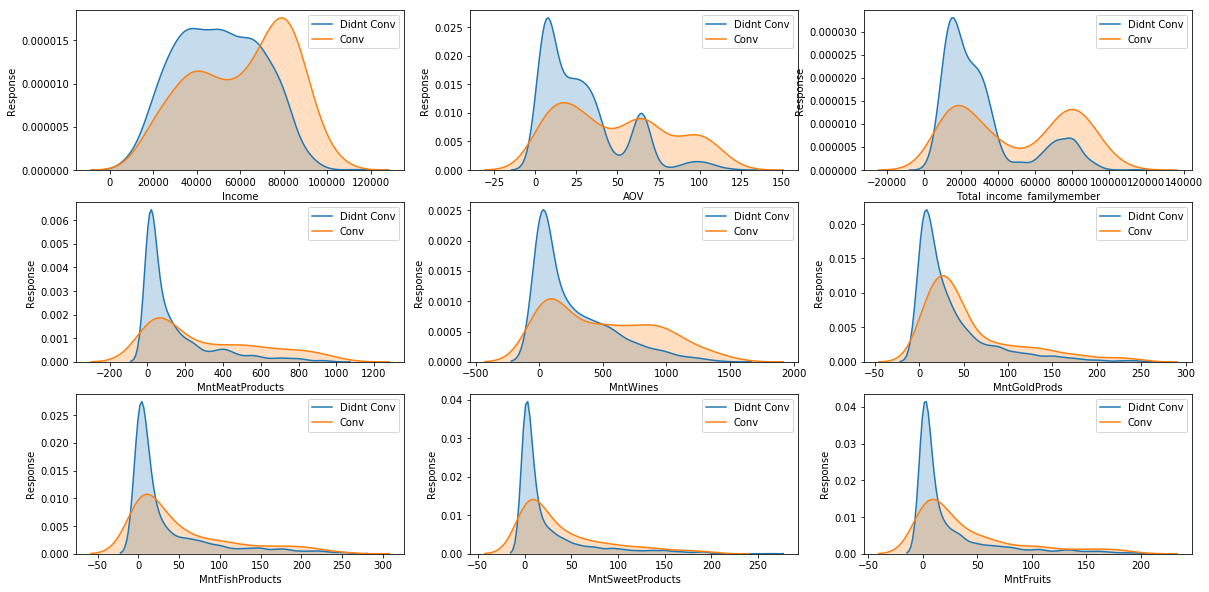

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(20, 10)
sns.kdeplot(df['Income'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[0][0])
sns.kdeplot(df['Income'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[0][0])
sns.kdeplot(df['AOV'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[0][1])
sns.kdeplot(df['AOV'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[0][1])
sns.kdeplot(df['Total_income_familymember'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[0][2])
sns.kdeplot(df['Total_income_familymember'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[0][2])
sns.kdeplot(df['MntMeatProducts'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[1][0])
sns.kdeplot(df['MntMeatProducts'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[1][0])
sns.kdeplot(df['MntWines'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[1][1])
sns.kdeplot(df['MntWines'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[1][1])
sns.kdeplot(df['MntGoldProds'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[1][2])
sns.kdeplot(df['MntGoldProds'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[1][2])
sns.kdeplot(df['MntFishProducts'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[2][0])
sns.kdeplot(df['MntFishProducts'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[2][0])
sns.kdeplot(df['MntSweetProducts'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[2][1])
sns.kdeplot(df['MntSweetProducts'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[2][1])
sns.kdeplot(df['MntFruits'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[2][2])
sns.kdeplot(df['MntFruits'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[2][2])


axes[0][0].set(xlabel='Income', ylabel='Response')
axes[0][1].set(xlabel='AOV', ylabel='Response')
axes[0][2].set(xlabel='Total_income_familymember', ylabel='Response')
axes[1][0].set(xlabel='MntMeatProducts', ylabel='Response')
axes[1][1].set(xlabel='MntWines', ylabel='Response')
axes[1][2].set(xlabel='MntGoldProds', ylabel='Response')
axes[2][0].set(xlabel='MntFishProducts', ylabel='Response')
axes[2][1].set(xlabel='MntSweetProducts', ylabel='Response')
axes[2][2].set(xlabel='MntFruits', ylabel='Response')

Seems that the most significant features for the response rate are: Income, AOV, Total_income_familymember and MntWines.

Lets investigate if there is any insightful information if we look for the amount spent in products as %: 

[Text(0, 0.5, 'Response'), Text(0.5, 0, '%Gold')]

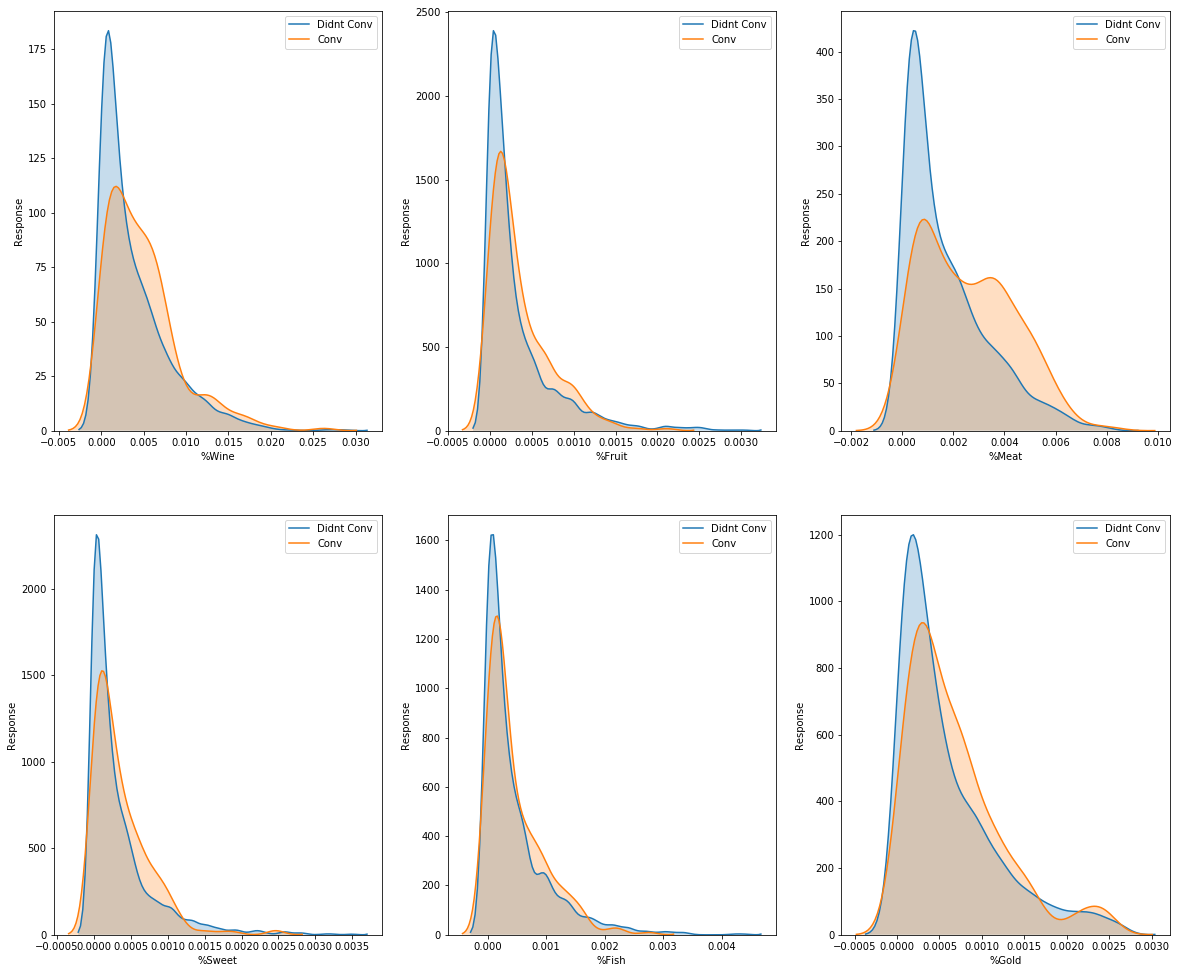

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 17)
sns.kdeplot(df['%Wine'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[0][0])
sns.kdeplot(df['%Wine'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[0][0])
sns.kdeplot(df['%Fruit'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[0][1])
sns.kdeplot(df['%Fruit'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[0][1])
sns.kdeplot(df['%Meat'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[0][2])
sns.kdeplot(df['%Meat'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[0][2])
sns.kdeplot(df['%Fish'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[1][1])
sns.kdeplot(df['%Fish'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[1][1])
sns.kdeplot(df['%Sweet'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[1][0])
sns.kdeplot(df['%Sweet'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[1][0])
sns.kdeplot(df['%Gold'].loc[df.Response == 0], shade=True,label='Didnt Conv',ax=axes[1][2])
sns.kdeplot(df['%Gold'].loc[df.Response == 1], shade=True, label='Conv',ax=axes[1][2])


axes[0][0].set(xlabel='%Wine', ylabel='Response')
axes[0][1].set(xlabel='%Fruit', ylabel='Response')
axes[0][2].set(xlabel='%Meat', ylabel='Response')
axes[1][1].set(xlabel='%Fish', ylabel='Response')
axes[1][0].set(xlabel='%Sweet', ylabel='Response')
axes[1][2].set(xlabel='%Gold', ylabel='Response')


Among those features, %Meat is the most insightful since customers who spent a higher % of their spends in meat had a higher conversion rate. The same accurs for %Wine.

Lets create a new features that potentialize this caracteristics.


In [24]:
df['products_factor']= (df['%Wine']+df['%Meat'])
df['products_factor']=normalize_minmax(df['products_factor'])

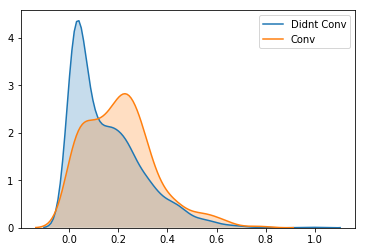

In [25]:
ax = sns.kdeplot(df['products_factor'].loc[df.Response == 0], shade=True,label='Didnt Conv')
ax = sns.kdeplot(df['products_factor'].loc[df.Response == 1], shade=True, label='Conv')

This new feature is called 'products_factor' and might be understood as 'how much more % wine and sweets the customer use to buy related to %meat'. 
The result are two distuingshable distributions with clearly apart peaks, which will be usefull to the model to learn.

### Lets investigate the behaviour of the customers related to the channels they use and interactions

As we can see below, the amount of Catalog and Web purchases is clearly correlated to the conversion rate.

[Text(0, 0.5, 'Response'), Text(0.5, 0, 'Total_Purchases')]

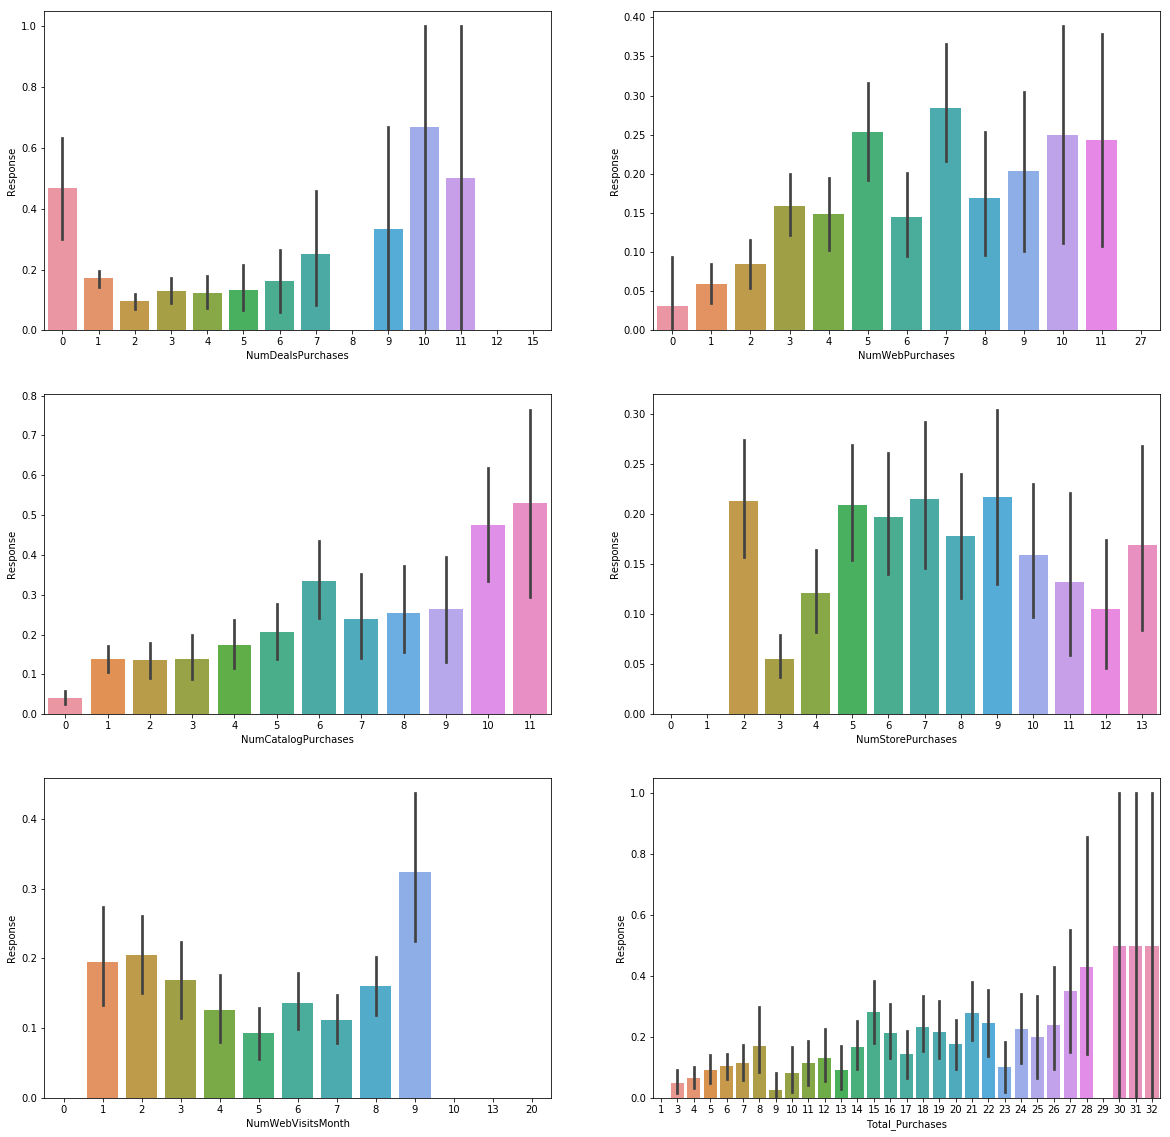

In [26]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 20)
sns.barplot(x='NumDealsPurchases',y='Response',data=df,ax=axes[0][0])
sns.barplot(x='NumWebPurchases',y='Response',data=df,ax=axes[0][1])
sns.barplot(x='NumCatalogPurchases',y='Response',data=df,ax=axes[1][0])
sns.barplot(x='NumStorePurchases',y='Response',data=df,ax=axes[1][1])
sns.barplot(x='NumWebVisitsMonth',y='Response',data=df,ax=axes[2][0])
sns.barplot(x='Total_Purchases',y='Response',data=df,ax=axes[2][1])

axes[0][0].set(xlabel='NumDealsPurchases', ylabel='Response')
axes[0][1].set(xlabel='NumWebPurchases', ylabel='Response')
axes[1][0].set(xlabel='NumCatalogPurchases', ylabel='Response')
axes[1][1].set(xlabel='NumStorePurchases', ylabel='Response')
axes[2][0].set(xlabel='NumWebVisitsMonth', ylabel='Response')
axes[2][1].set(xlabel='Total_Purchases', ylabel='Response')

We can also see that people who never purchased a deal have a higher convertion rate. Lets created a features for it. 

In [27]:
df['Deal_purchases'] = np.where(df['NumDealsPurchases']==0, 1, 0)

#### Lets check if the amount of purchases in percent is insightful as well

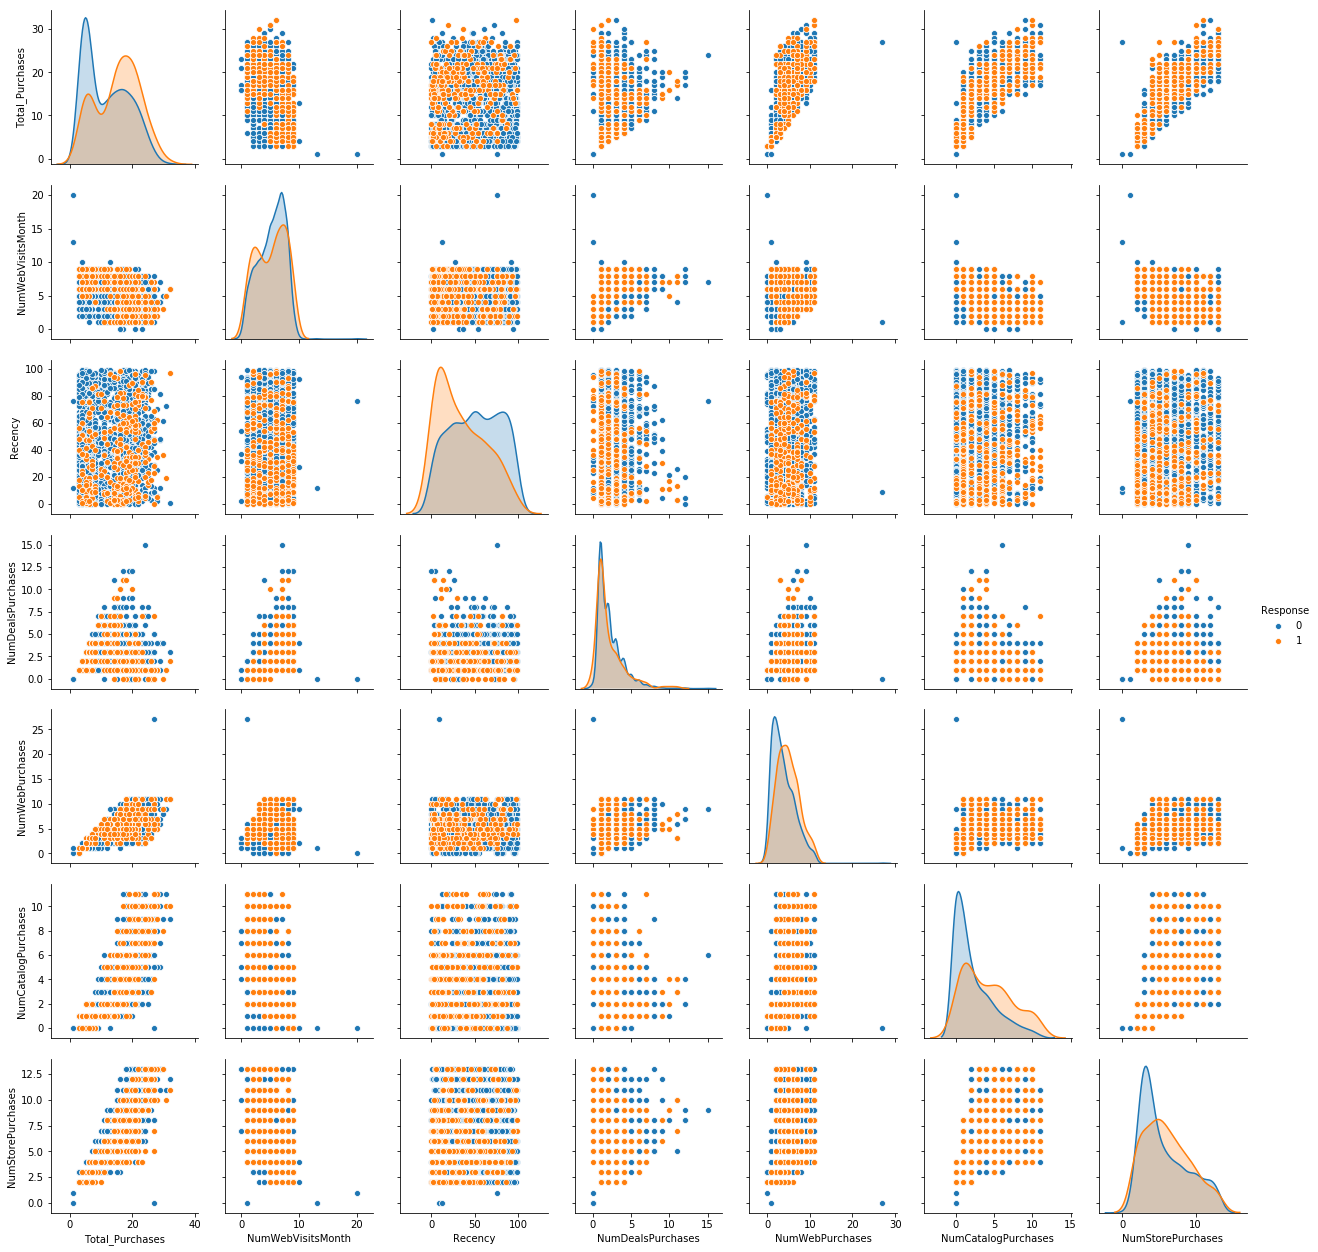

In [28]:
columns=['Total_Purchases','NumWebVisitsMonth','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
sns.pairplot(df, x_vars=columns,y_vars=columns, hue='Response')

We have some strong features in Recency and Total_Purchases!

Theres is no strong correlation between features, besides what we already expect (Total_Purchases & NumCatalog Purchases for example).

Lets see if the % values are valuable:

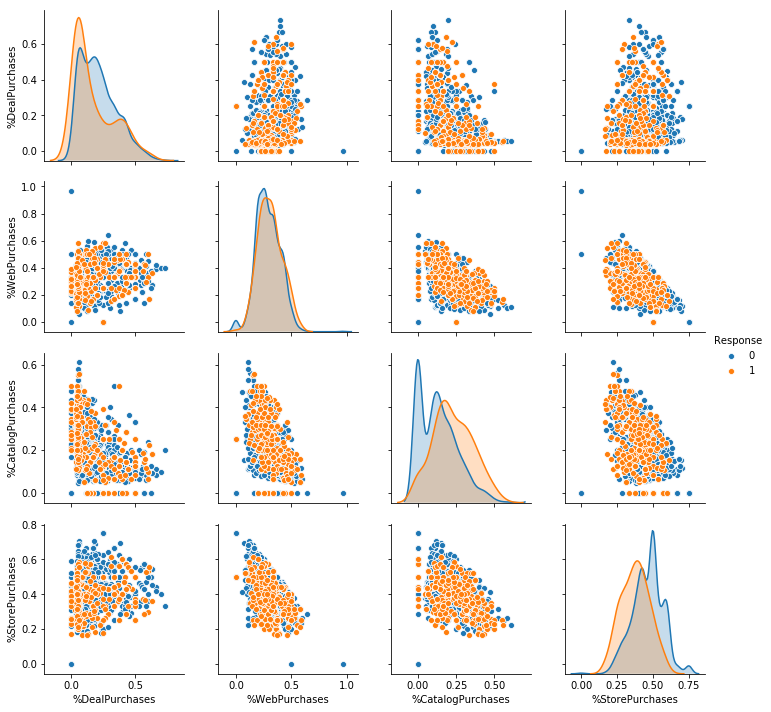

In [29]:
columns=['%DealPurchases','%WebPurchases','%CatalogPurchases','%StorePurchases']
sns.pairplot(df, x_vars=columns,y_vars=columns, hue='Response')

Its clear that %Store/%Catalog purchases have a strong impact in the conversion rate.

Lets create a new feature that enhance this impact.

In [30]:
df['channels_factor']=normalize_minmax((df['%CatalogPurchases']-df['%StorePurchases']))

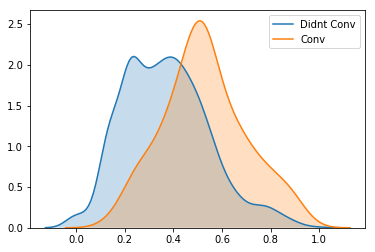

In [31]:
ax = sns.kdeplot(df['channels_factor'].loc[df.Response == 0], shade=True,label='Didnt Conv')
ax = sns.kdeplot(df['channels_factor'].loc[df.Response == 1], shade=True, label='Conv')

This new feature may be interpreted as the customer's preference between Catalog or Store purchases.
Seems like people who accepted the campaing are strongly biased to buy from Catalogs rather then Stores.



#### Finally lets take a look in our data:

In [32]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_as_Customer,Family_Size,Total_income_familymember,Total_Conv,RecentCmp,Total_spent,Total_spent_percent_income,Total_Purchases,AOV,Total_Purchases_year,%Wine,%Fruit,%Meat,%Fish,%Sweet,%Gold,%WebPurchases,%CatalogPurchases,%StorePurchases,%DealPurchases,products_factor,Deal_purchases,channels_factor
count,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.0,1940.0,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000,1940.000000
mean,51876.576289,0.444845,0.497423,48.945361,298.796907,26.191753,163.780412,37.096392,27.004124,39.084021,2.214948,4.019588,2.594330,5.807216,5.262887,0.067010,0.078351,0.071649,0.067526,0.012371,0.009278,3.0,11.0,0.148454,51.151031,6.951031,1.942268,33797.621757,0.296907,0.762371,552.869588,0.004269,12.421134,31.214162,1.789240,0.003920,0.000323,0.001832,0.000454,0.000333,0.000608,0.294493,0.148872,0.451445,0.207700,0.162409,0.015464,0.392862
std,20322.888950,0.538894,0.539797,29.001718,332.625494,39.949573,217.169660,54.539863,41.364940,45.508322,1.691432,2.643826,2.761794,3.205518,2.305444,0.250104,0.268792,0.257973,0.250995,0.110564,0.095901,0.0,0.0,0.355641,11.652364,0.682934,0.748226,24640.030675,0.680147,1.607655,573.235125,0.003688,7.140487,26.931865,1.028127,0.004103,0.000426,0.001653,0.000566,0.000446,0.000575,0.107938,0.127250,0.108416,0.144372,0.143638,0.123421,0.183058
min,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,24.000000,6.000000,1.000000,2652.500000,0.000000,0.000000,6.000000,0.000089,1.000000,1.500000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35687.000000,0.000000,0.000000,24.000000,23.000000,1.000000,15.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000,6.000000,1.000000,15449.125000,0.000000,0.000000,53.000000,0.000908,6.000000,8.276786,0.851190,0.000770,0.000044,0.000500,0.000075,0.000041,0.000182,0.210526,0.000000,0.380952,0.076923,0.038218,0.000000,0.240418
50%,51381.500000,0.000000,0.000000,49.000000,172.000000,8.000000,65.000000,12.000000,8.000000,22.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,50.000000,7.000000,2.000000,24941.500000,0.000000,0.000000,309.500000,0.003307,12.000000,23.653846,1.714286,0.002549,0.000162,0.001286,0.000237,0.000169,0.000411,0.285714,0.134848,0.454545,0.181818,0.130269,0.000000,0.384146
75%,68179.500000,1.000000,1.000000,74.000000,494.250000,32.250000,223.250000,49.250000,33.000000,50.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,7.000000,2.000000,39795.375000,0.000000,0.000000,957.000000,0.007063,18.000000,42.167143,2.625000,0.005809,0.000431,0.002796,0.000626,0.000445,0.000868,0.375000,0.228147,0.500000,0.300000,0.243863,0.000000,0.512195
max,113734.000000,2.000000,2.000000,99.000000,1492.000000,197.000000,984.000000,259.000000,262.000000,249.000000,15.000000,27.000000,11.000000

There are still some categorical data in out set that we need to transform in numerical and two columns that we'll not use in the model cbuilding, but in its evaluation ( Z_CostContact and Z_Revenue)

In [33]:
education_dummies=pd.get_dummies(df['Education'], drop_first=True)
marital_dummies=pd.get_dummies(df['Marital_Status'], drop_first=True)

In [34]:
df=pd.concat([df,education_dummies,marital_dummies], axis=1)
df.drop(['Z_CostContact','Z_Revenue','Education','Marital_Status'],axis=1,inplace=True)

In [35]:
df.to_csv('data_processed.csv')


In [36]:
df.to_csv('data_modelo.csv')